In [164]:
import  pandas as pd

In [165]:
import numpy as np

In [575]:
df=pd.read_excel(r"C:\Users\HP\Desktop\Car Price Prediction Data.xlsx")

In [576]:
df

Manufacturing year    Brand                             Model  \
0                   2020   Maruti                 Swift\nLXI Manual   
1                   2020   Maruti     New Wagon-R\nLXI 1.0 L Manual   
2                   2020   Maruti                 Swift\nVXI Manual   
3                   2019   Maruti                 Swift\nLXI Manual   
4                   2020   Maruti                 Swift\nLXI Manual   
...                  ...      ...                               ...   
5103                2022   Maruti              Alto\nLXI OPT Manual   
5104                2018     Ford   osport\n1.5TITANIUM TDCI Manual   
5105                2016  Hyundai  Grand i10\nMAGNA 1.2 VTVT Manual   
5106                2015    Honda      ity\nVX CVT PETROL Automatic   
5107                2016  Hyundai              Xcent\nS 1.2 Manual'   

     Driven kilometers Number of owners            Fuel   Location   Price  
0                12421       2nd  Owner        Petrol    Delhi NCR  571999  
1                 2713       2nd  Owner        Petrol    Delhi NCR  504199  
2                20792       2nd  Owner        Petrol    Delhi NCR  642799  
3                26753       2nd  Owner        Petrol    Delhi NCR  537899  
4                48621       2nd  Owner        Petrol    Delhi NCR  537199  
...                ...              ...             ...        ...     ...  
5103              4061        1st Owner        Petrol    Ahmedabad  419000  
5104             49562        1st Owner          Diesel  Ahmedabad  780099  
5105             86493        1st Owner  Petrol   + CNG  Ahmedabad  443000  
5106             51402       2nd  Owner        Petrol    Ahmedabad  727000  
5107             91877        1st Owner        Petrol    Ahmedabad  522000  

[5108 rows x 8 columns]

In [577]:
df.head()

Manufacturing year   Brand                          Model  \
0                2020  Maruti              Swift\nLXI Manual   
1                2020  Maruti  New Wagon-R\nLXI 1.0 L Manual   
2                2020  Maruti              Swift\nVXI Manual   
3                2019  Maruti              Swift\nLXI Manual   
4                2020  Maruti              Swift\nLXI Manual   

  Driven kilometers Number of owners      Fuel   Location   Price  
0             12421       2nd  Owner  Petrol    Delhi NCR  571999  
1              2713       2nd  Owner  Petrol    Delhi NCR  504199  
2             20792       2nd  Owner  Petrol    Delhi NCR  642799  
3             26753       2nd  Owner  Petrol    Delhi NCR  537899  
4             48621       2nd  Owner  Petrol    Delhi NCR  537199

# 1. Data Cleaning

In [578]:
df.shape

(5108, 8)

In [579]:
df.dtypes

Manufacturing year     int64
Brand                 object
Model                 object
Driven kilometers     object
Number of owners      object
Fuel                  object
Location              object
Price                 object
dtype: object

In [580]:
df['Price'].nunique()

2215

In [581]:
df['Brand'].nunique()

29

In [582]:
df['Model'].nunique()

1398

In [583]:
df['Driven kilometers'].nunique()

4590

In [584]:
df['Driven kilometers'].isnull().sum()

0

In [585]:
df['Number of owners'].nunique()

3

In [586]:
df['Fuel'].nunique()

3

In [587]:
df['Location'].nunique()

8

In [588]:
df.isnull().sum()

Manufacturing year       0
Brand                    0
Model                    0
Driven kilometers        0
Number of owners         0
Fuel                     0
Location                 0
Price                 1115
dtype: int64

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Manufacturing year  5108 non-null   int64 
 1   Brand               5108 non-null   object
 2   Model               5108 non-null   object
 3   Driven kilometers   5108 non-null   object
 4   Number of owners    5108 non-null   object
 5   Fuel                5108 non-null   object
 6   Location            5108 non-null   object
 7   Price               3993 non-null   object
dtypes: int64(1), object(7)
memory usage: 319.4+ KB


In [590]:
df.shape[0]

5108

In [591]:
df.shape[1]

8

In [592]:
df['Price'].fillna(df['Price'].mode()[0], inplace=True)

In [593]:
df.isnull().sum()

Manufacturing year    0
Brand                 0
Model                 0
Driven kilometers     0
Number of owners      0
Fuel                  0
Location              0
Price                 0
dtype: int64

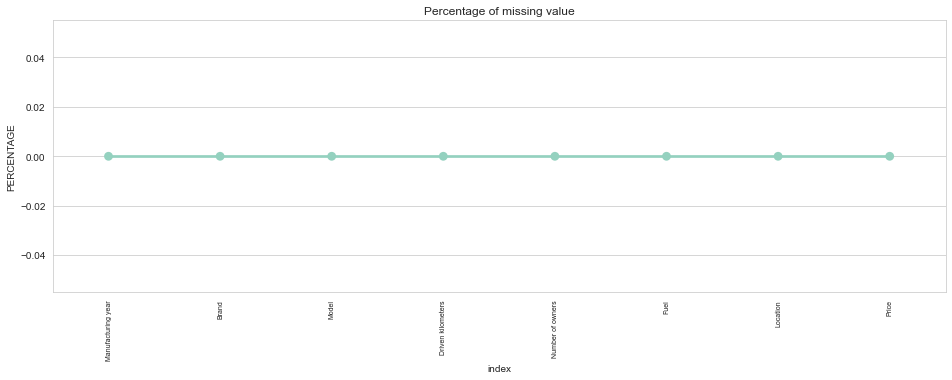

In [594]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()

Since there is no null values

In [595]:
df['Price'].shape

(5108,)

In [596]:
df['Driven kilometers'].shape

(5108,)

In [597]:
df['Driven kilometers'].isnull().sum()

0

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Manufacturing year  5108 non-null   int64 
 1   Brand               5108 non-null   object
 2   Model               5108 non-null   object
 3   Driven kilometers   5108 non-null   object
 4   Number of owners    5108 non-null   object
 5   Fuel                5108 non-null   object
 6   Location            5108 non-null   object
 7   Price               5108 non-null   object
dtypes: int64(1), object(7)
memory usage: 319.4+ KB


# Exploratory Data Analysis

In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
import seaborn as sns
import matplotlib.pyplot as plt

In [603]:
df['Brand'].value_counts()

Maruti        2117
Hyundai       1359
Honda          441
Renault        209
Tata           205
Ford           136
Mahindra       110
Toyota         105
KIA            104
Volkswagen      99
Skoda           56
MG HECTOR       41
Datsun          34
Jeep            31
Nissan          28
Honda            9
Ford             6
Tata             3
Maruti           3
KIA              2
Fiat             2
Jaguar           1
SKODA            1
MG HECTOR        1
Mercedes         1
Skoda            1
Datsun           1
BMW              1
Audi             1
Name: Brand, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

Text(0, 0.5, 'Count of cars')

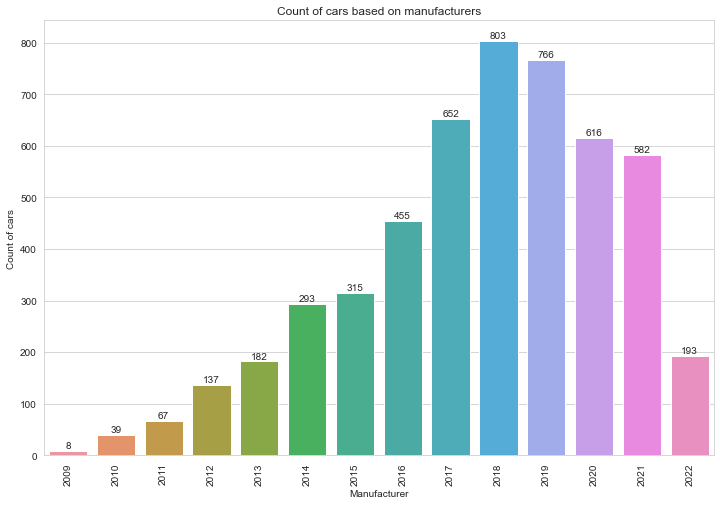

In [608]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturing year', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")


Maximum cars in the dataset are manufactured in 2018

Text(0, 0.5, 'Count of cars')

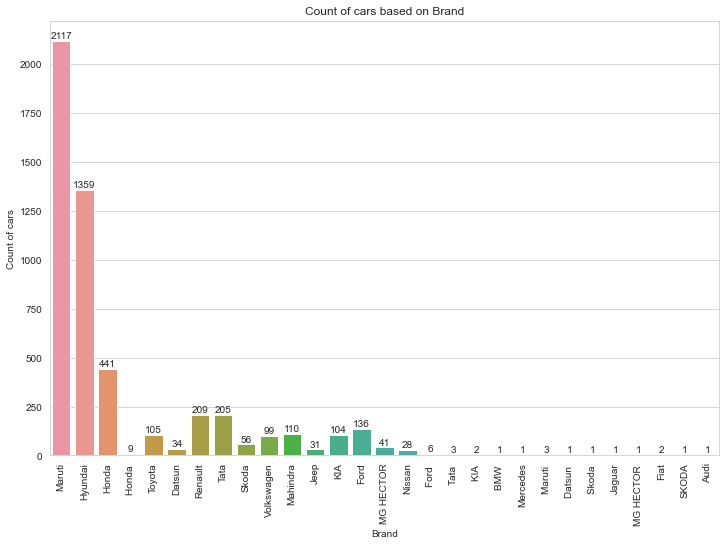

In [605]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brand")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

Maximum cars in the dataset of maruti brand

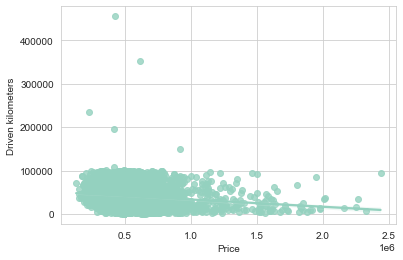

In [617]:

sns.regplot(df['Price'],df['Driven kilometers'])
plt.show()


Lesser the Kms driven higher the Selling Price *

# Data Pre-processing


Convert Data into object to numeric

In [621]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [622]:
df['Driven kilometers'] = pd.to_numeric(df['Driven kilometers'],errors='coerce')

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturing year  5108 non-null   int64  
 1   Brand               5108 non-null   object 
 2   Model               5108 non-null   object 
 3   Driven kilometers   5093 non-null   float64
 4   Number of owners    5108 non-null   object 
 5   Fuel                5108 non-null   object 
 6   Location            5108 non-null   object 
 7   Price               5107 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 319.4+ KB


In [623]:
df['Driven kilometers'].fillna(df['Driven kilometers'].mean(), inplace=True)

In [625]:
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturing year  5108 non-null   int64  
 1   Brand               5108 non-null   object 
 2   Model               5108 non-null   object 
 3   Driven kilometers   5108 non-null   float64
 4   Number of owners    5108 non-null   object 
 5   Fuel                5108 non-null   object 
 6   Location            5108 non-null   object 
 7   Price               5108 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 319.4+ KB


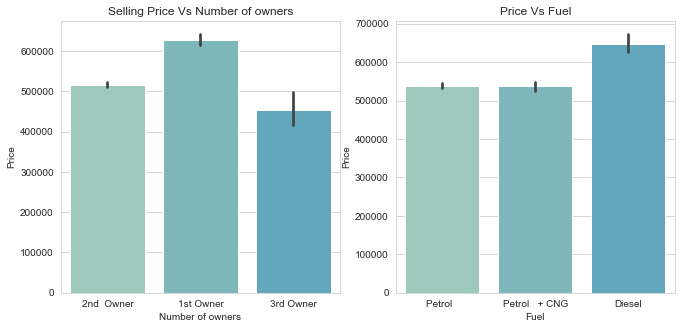

In [613]:
#Fuel Type and owners types Visualization with target variable

plt.figure(figsize=[17,5])
plt.subplot(1,3,3)
sns.barplot(df['Fuel'],df['Price'])
plt.title('Price Vs Fuel')

plt.subplot(1,3,2)
sns.barplot(df['Number of owners'],df['Price'])
plt.title('Selling Price Vs Number of owners')

plt.show()

Selling Price is high with 1st Owners used Cars *

Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

In [627]:
df.head()

Manufacturing year   Brand                          Model  \
0                2020  Maruti              Swift\nLXI Manual   
1                2020  Maruti  New Wagon-R\nLXI 1.0 L Manual   
2                2020  Maruti              Swift\nVXI Manual   
3                2019  Maruti              Swift\nLXI Manual   
4                2020  Maruti              Swift\nLXI Manual   

   Driven kilometers Number of owners      Fuel   Location     Price  
0            12421.0       2nd  Owner  Petrol    Delhi NCR  571999.0  
1             2713.0       2nd  Owner  Petrol    Delhi NCR  504199.0  
2            20792.0       2nd  Owner  Petrol    Delhi NCR  642799.0  
3            26753.0       2nd  Owner  Petrol    Delhi NCR  537899.0  
4            48621.0       2nd  Owner  Petrol    Delhi NCR  537199.0

Dealing With Categorical Variables

In [628]:
# Here's our categorical column
print(df['Fuel'].unique())
print(df['Location'].unique())
print(df['Model'].unique())
print(df['Brand'].unique())
print(df['Brand'].unique())
print(df['Number of owners'].unique)


['Petrol  ' 'Petrol   + CNG' 'Diesel']
['Delhi NCR' 'Mumbai' 'Noida' 'Bangalore' 'Pune' 'Hayderabad' 'Chennai'
 'Ahmedabad']
['Swift\\nLXI Manual' 'New Wagon-R\\nLXI 1.0 L Manual'
 'Swift\\nVXI Manual' ... 'a Thar\\nLX 4WD AT CONVERTIBLE Automatic'
 'Grand i10\\nMAGNA 1.1 CRDI Manual' "Xcent\\nS 1.2 Manual'"]
['Maruti' 'Hyundai' 'Honda' 'Honda ' 'Toyota' 'Datsun' 'Renault' 'Tata'
 'Skoda' 'Volkswagen' 'Mahindra' 'Jeep' 'KIA' 'Ford' 'MG HECTOR' 'Nissan'
 'Ford ' 'Tata ' 'KIA ' 'BMW ' 'Mercedes' 'Maruti ' 'Datsun ' 'Skoda '
 'Jaguar' 'MG HECTOR ' 'Fiat' 'SKODA' 'Audi']
['Maruti' 'Hyundai' 'Honda' 'Honda ' 'Toyota' 'Datsun' 'Renault' 'Tata'
 'Skoda' 'Volkswagen' 'Mahindra' 'Jeep' 'KIA' 'Ford' 'MG HECTOR' 'Nissan'
 'Ford ' 'Tata ' 'KIA ' 'BMW ' 'Mercedes' 'Maruti ' 'Datsun ' 'Skoda '
 'Jaguar' 'MG HECTOR ' 'Fiat' 'SKODA' 'Audi']
<bound method Series.unique of 0       2nd  Owner
1       2nd  Owner
2       2nd  Owner
3       2nd  Owner
4       2nd  Owner
           ...    
5103     1st Owner

In [629]:
print(df['Number of owners'].nunique)

<bound method IndexOpsMixin.nunique of 0       2nd  Owner
1       2nd  Owner
2       2nd  Owner
3       2nd  Owner
4       2nd  Owner
           ...    
5103     1st Owner
5104     1st Owner
5105     1st Owner
5106    2nd  Owner
5107     1st Owner
Name: Number of owners, Length: 5108, dtype: object>


In [630]:
df['Number of owners'].unique()

array(['2nd  Owner', '1st Owner', '3rd Owner'], dtype=object)

In [631]:
df['Fuel'].unique()

array(['Petrol  ', 'Petrol   + CNG', 'Diesel'], dtype=object)

In [632]:
from sklearn import preprocessing

In [633]:
label_encoder = preprocessing.LabelEncoder()

In [634]:
df['Number of owners']= label_encoder.fit_transform(df['Number of owners'])
df['Fuel']= label_encoder.fit_transform(df['Fuel'])


In [635]:
df.head()

Manufacturing year   Brand                          Model  \
0                2020  Maruti              Swift\nLXI Manual   
1                2020  Maruti  New Wagon-R\nLXI 1.0 L Manual   
2                2020  Maruti              Swift\nVXI Manual   
3                2019  Maruti              Swift\nLXI Manual   
4                2020  Maruti              Swift\nLXI Manual   

   Driven kilometers  Number of owners  Fuel   Location     Price  
0            12421.0                 1     1  Delhi NCR  571999.0  
1             2713.0                 1     1  Delhi NCR  504199.0  
2            20792.0                 1     1  Delhi NCR  642799.0  
3            26753.0                 1     1  Delhi NCR  537899.0  
4            48621.0                 1     1  Delhi NCR  537199.0

Brand & Model 

I'll also drop the Brand & Model column.

In [636]:
df.drop("Brand", axis = 1, inplace = True)
df.drop("Model", axis = 1, inplace = True)

Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [637]:
df.drop("Location", axis = 1, inplace = True)

In [638]:
import datetime


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Manufacturing year

Manufacturing year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [639]:
curr_time = datetime.datetime.now()
df['Manufacturing year'] = df['Manufacturing year'].apply(lambda x : curr_time.year - x)

In [640]:
df.head()

Manufacturing year  Driven kilometers  Number of owners  Fuel     Price
0                   2            12421.0                 1     1  571999.0
1                   2             2713.0                 1     1  504199.0
2                   2            20792.0                 1     1  642799.0
3                   3            26753.0                 1     1  537899.0
4                   2            48621.0                 1     1  537199.0

# Model Building

In [641]:
x=df.iloc[:,:-1]

In [642]:
x

Manufacturing year  Driven kilometers  Number of owners  Fuel
0                      2            12421.0                 1     1
1                      2             2713.0                 1     1
2                      2            20792.0                 1     1
3                      3            26753.0                 1     1
4                      2            48621.0                 1     1
...                  ...                ...               ...   ...
5103                   0             4061.0                 0     1
5104                   4            49562.0                 0     0
5105                   6            86493.0                 0     2
5106                   7            51402.0                 1     1
5107                   6            91877.0                 0     1

[5108 rows x 4 columns]

In [643]:
y=df.iloc[:,-1]

In [644]:
y

0       571999.0
1       504199.0
2       642799.0
3       537899.0
4       537199.0
          ...   
5103    419000.0
5104    780099.0
5105    443000.0
5106    727000.0
5107    522000.0
Name: Price, Length: 5108, dtype: float64

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturing year  5108 non-null   int64  
 1   Driven kilometers   5108 non-null   float64
 2   Number of owners    5108 non-null   int32  
 3   Fuel                5108 non-null   int32  
 4   Price               5108 non-null   float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 159.8 KB


# 5. Model Evaluation

Finally, as the last step of data processing, I'll scale the data.

In [646]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 5. Model Evaluation

In [648]:
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)


In [649]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print("\n")
          

At random state 0,the training accuracy is :-0.19666086148749484
At random state 0,the testing accuracy is :-0.19314941165693966


At random state 1,the training accuracy is :-0.19578955965206113
At random state 1,the testing accuracy is :-0.19800287221850166


At random state 2,the training accuracy is :-0.19229432825765147
At random state 2,the testing accuracy is :-0.212204912783593


At random state 3,the training accuracy is :-0.2018947277592209
At random state 3,the testing accuracy is :-0.1684305746714998


At random state 4,the training accuracy is :-0.19749178545955592
At random state 4,the testing accuracy is :-0.19135969362914573


At random state 5,the training accuracy is :-0.2029464802205636
At random state 5,the testing accuracy is :-0.16655299475421026


At random state 6,the training accuracy is :-0.19967489354691015
At random state 6,the testing accuracy is :-0.18172083198437794


At random state 7,the training accuracy is :-0.19458725171072833
At random state 7,the t

In [650]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_pred = linearRegression.predict(x_test)
r2_score(y_test, y_pred)

0.22293968595748115

# 6. Selecting the best model

In [651]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)


0.023616821081140937